import libraries

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

EDA

check dataset

In [18]:
df = pd.read_csv('simulated_judi_dataset.csv')
df.head()

,amount,transaction_type,merchant_category,location,device_used,is_fraud,time_since_last_transaction,velocity_score,geo_anomaly_score,keyword_match
0,359359,transfer,others,Surabaya,iOS,0,419,0.84,0.59,0
1,40660,purchase,others,Medan,Android,0,233,0.87,0.53,0
2,204148,purchase,entertainment,Jakarta,Android,1,599,0.43,0.47,1
3,136986,purchase,entertainment,Medan,Windows,1,224,0.79,0.58,1
4,21520,purchase,entertainment,Jakarta,Android,1,61,0.98,0.91,1


In [19]:
df["is_fraud"].value_counts()

is_fraud
1    7204
0    2796
Name: count, dtype: int64

pairplot

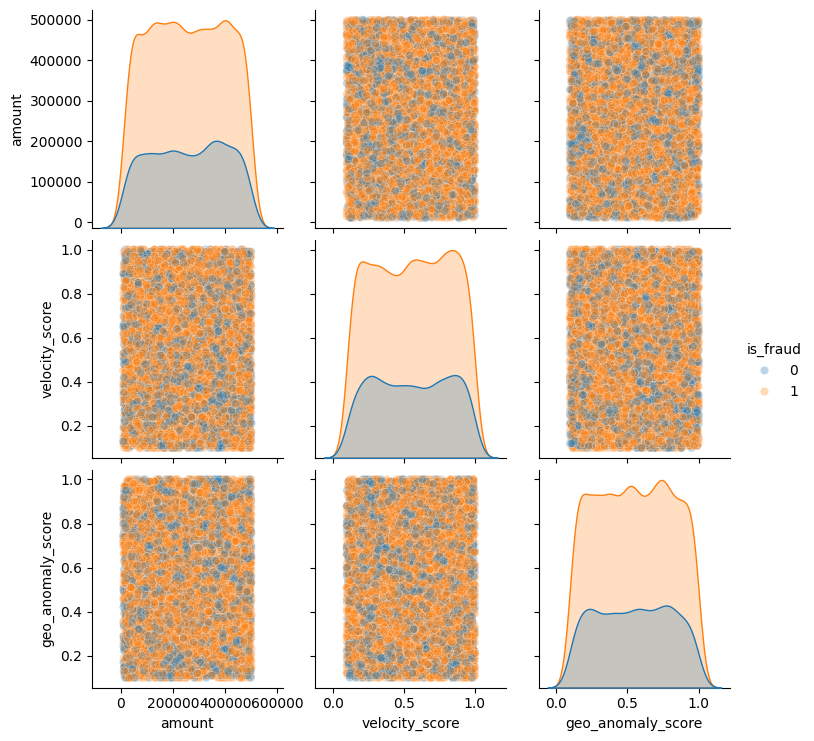

In [20]:
sns.pairplot(df[['amount', 'velocity_score', 'geo_anomaly_score', 'is_fraud']], hue="is_fraud", plot_kws={"alpha": 0.3})
plt.show()

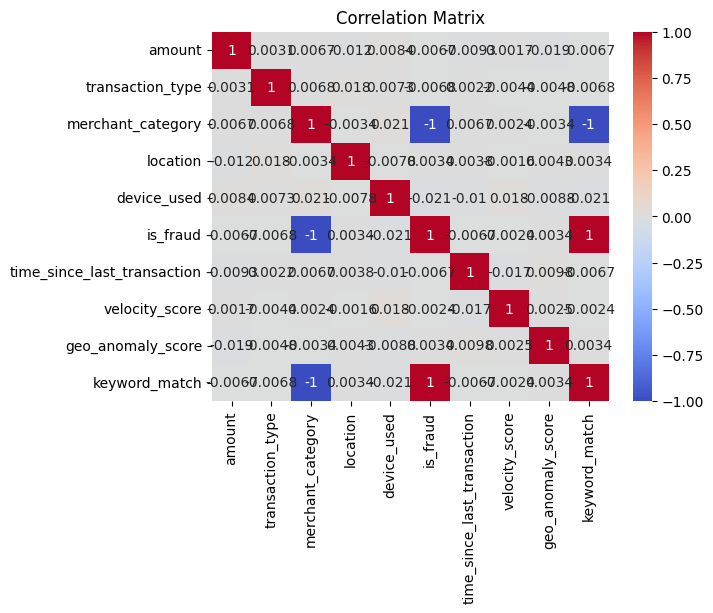

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [21]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['transaction_type', 'merchant_category', 'location', 'device_used']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


In [22]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['amount', 'time_since_last_transaction', 'velocity_score', 'geo_anomaly_score']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [23]:
from sklearn.model_selection import train_test_split

X = df.drop(['is_fraud', 'keyword_match'], axis=1)

y = df['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


[[ 839    0]
 [   0 2161]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       839
           1       1.00      1.00      1.00      2161

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

ROC AUC Score: 1.0


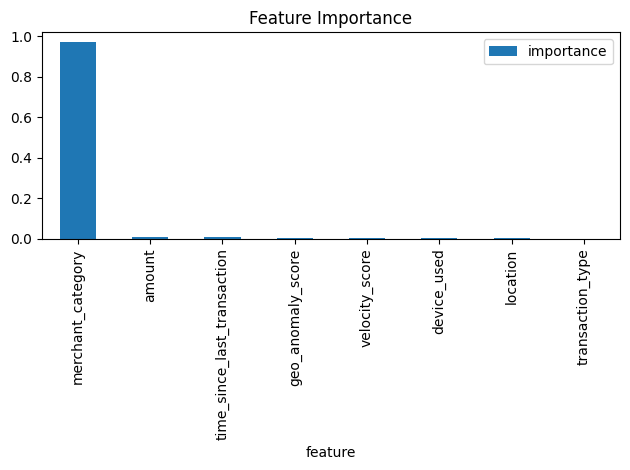

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns
fi_df = pd.DataFrame({"feature": features, "importance": importances}).sort_values(by="importance", ascending=False)

fi_df.plot.bar(x='feature', y='importance', title='Feature Importance')
plt.tight_layout()
plt.show()
